<a href="https://colab.research.google.com/github/lordpiyush938/CVIP-DataScience/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv', sep=',', encoding='latin-1')
df.head()

<ipython-input-5-870312922d4d>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv', sep=',', encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# I want To analyze the following columns
df = df[['eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','targtype1_txt',
        'gname','weaptype1_txt','dbsource']]

In [7]:
#shape of the dataset
df.shape

(181691, 11)

In [8]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Unknown,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS


In [9]:
#finding all null values in the columns
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dbsource           0
dtype: int64

In [10]:
#discription of dataset
df.describe()

,eventid,iyear,imonth,iday
count,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644
std,1.325957e+09,13.259430,3.388303,8.814045
min,1.970000e+11,1970.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000
max,2.017123e+11,2017.000000,12.000000,31.000000


In [11]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   country_txt      181691 non-null  object
 5   region_txt       181691 non-null  object
 6   attacktype1_txt  181691 non-null  object
 7   targtype1_txt    181691 non-null  object
 8   gname            181691 non-null  object
 9   weaptype1_txt    181691 non-null  object
 10  dbsource         181691 non-null  object
dtypes: int64(4), object(7)
memory usage: 15.2+ MB


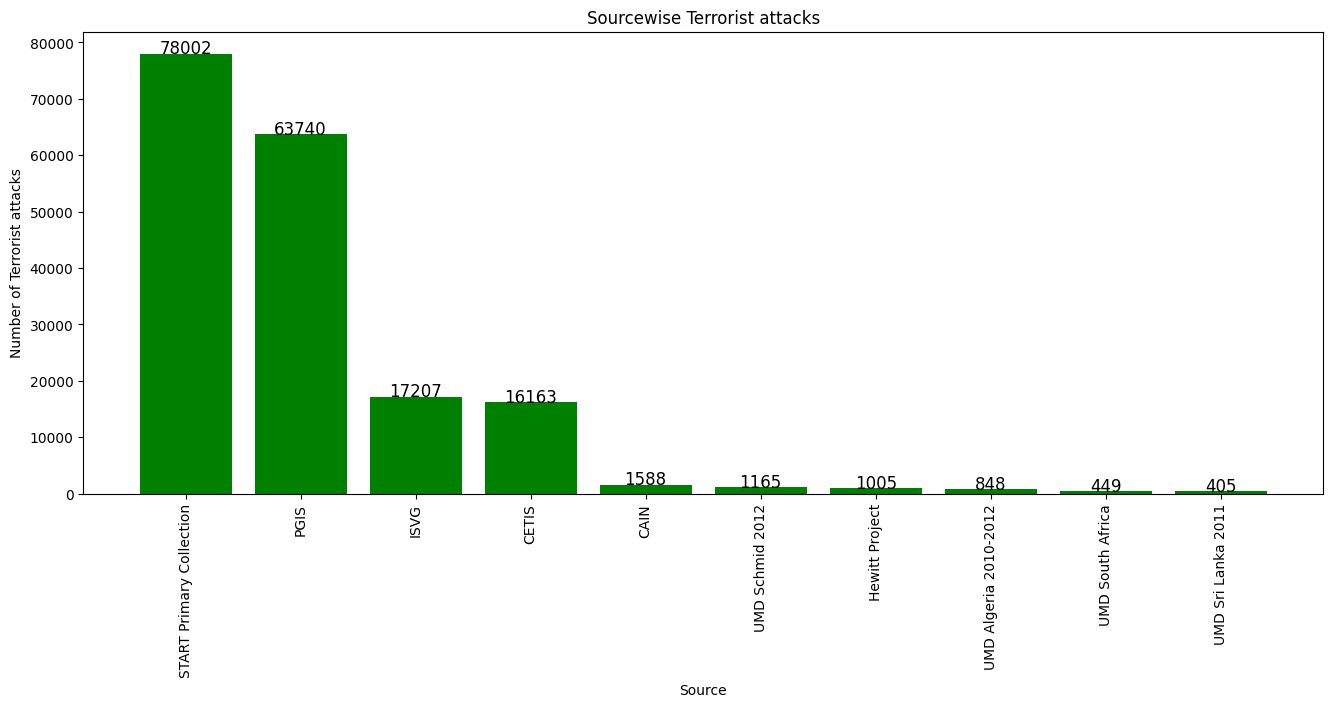

In [19]:
#sourcewise terrorist attack

plt.figure(figsize=(16,6))
plt.bar(df.dbsource.value_counts()[:10].index,df.dbsource.value_counts()[:10].values,color='green')
# set the axis labels and title
plt.xlabel('Source')
plt.ylabel('Number of Terrorist attacks')
plt.title('Sourcewise Terrorist attacks')
plt.xticks(rotation=90)
# # rotate the x-axis labels for better visibility
for i, v in enumerate(df.dbsource.value_counts()[:10].values):
    plt.text(df.dbsource.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

In [18]:
# list of  countries with Highest terrorism

df.country_txt.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

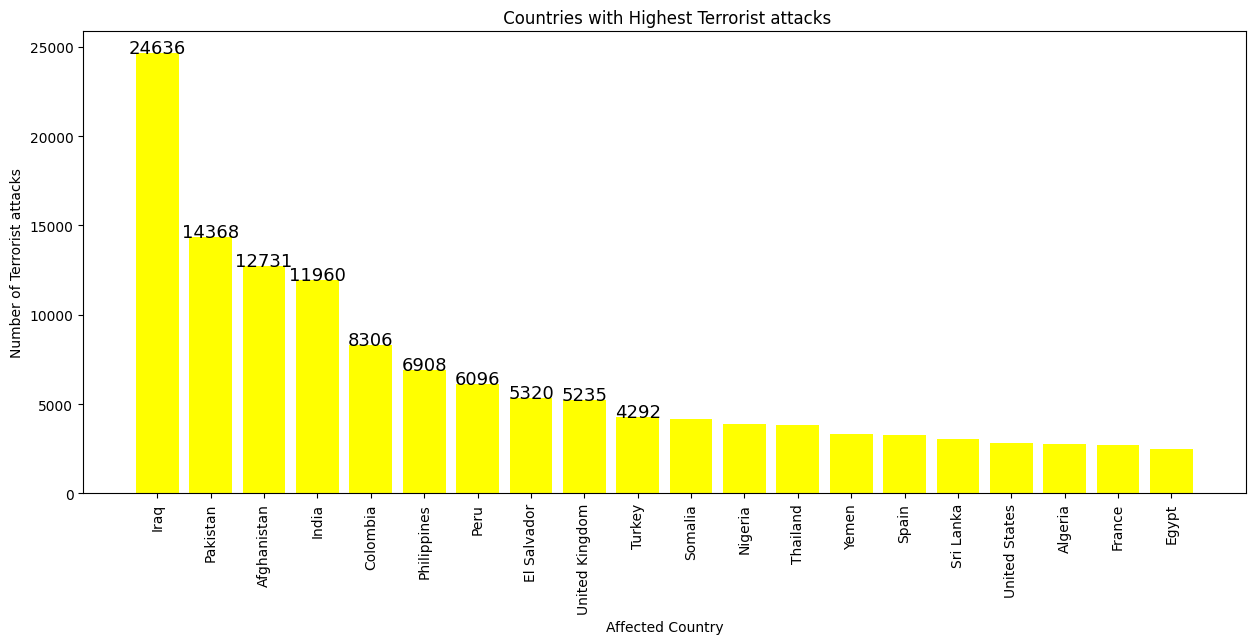

In [17]:
#plotting the top 20 countries with Highest Terrorist attacks

plt.figure(figsize=(15,6))
plt.bar(df.country_txt.value_counts()[:20].index,df.country_txt.value_counts()[:20].values,color='yellow')
# set the axis labels and title
plt.xlabel('Affected Country')
plt.ylabel('Number of Terrorist attacks')
plt.title(' Countries with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.country_txt.value_counts()[:10].values):
    plt.text(df.country_txt.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [21]:
# Regions which face Highest Terrorist Attacks

df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

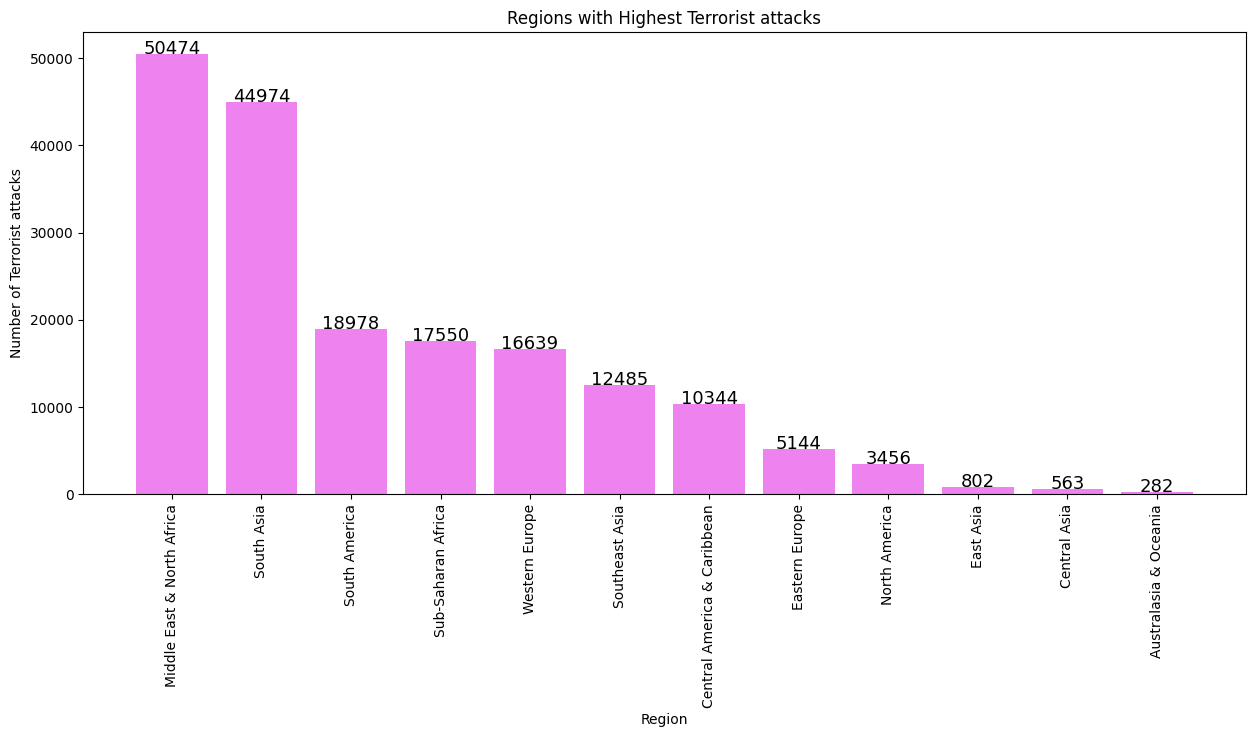

In [23]:
#Plotting the Region with Highest Terrorist Attacks

plt.figure(figsize=(15,6))
plt.bar(df.region_txt.value_counts().index,df.region_txt.value_counts().values,color='violet')
# set the axis labels and title
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Highest Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.region_txt.value_counts().values):
    plt.text(df.region_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [24]:
# Common types of Terrorist Attacks
df.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

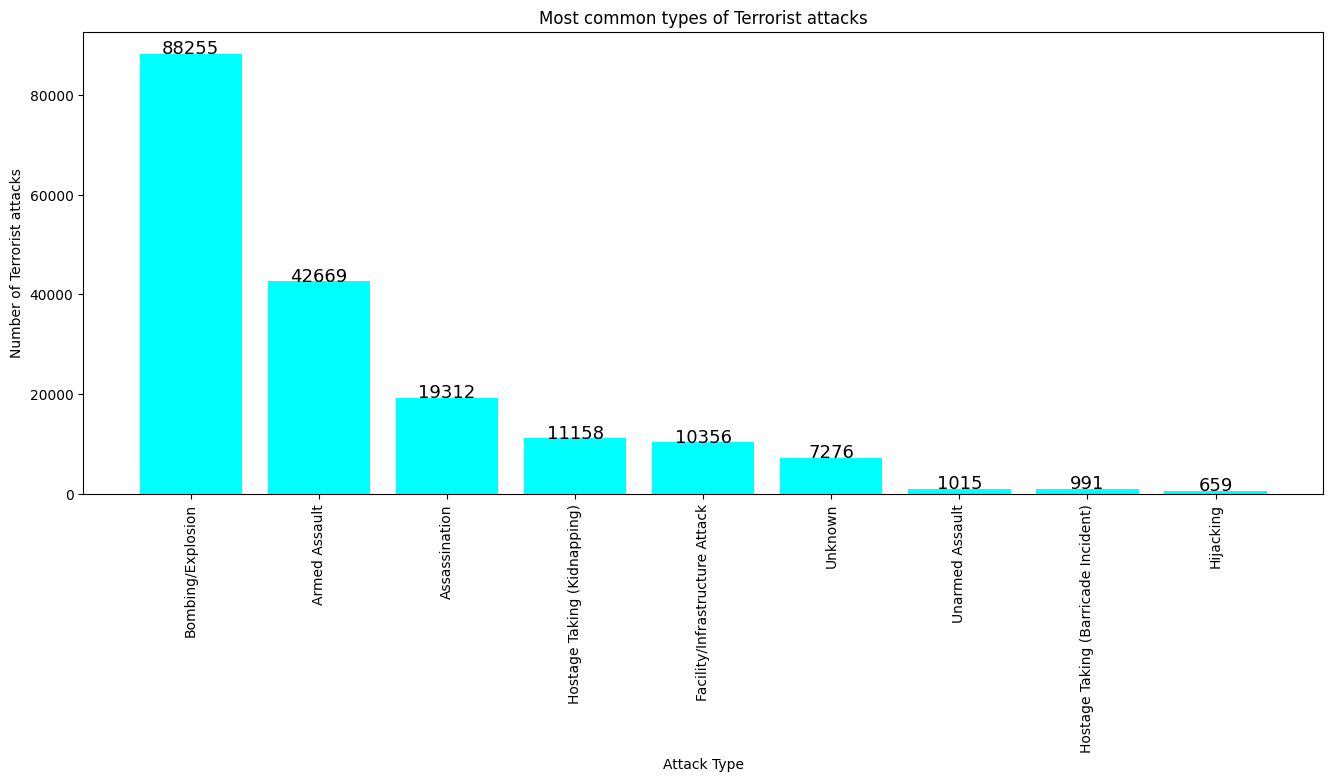

In [27]:
#Plotting the Common types of Terrorist Attacks

plt.figure(figsize=(16,6))
plt.bar(df.attacktype1_txt.value_counts().index,df.attacktype1_txt.value_counts().values,color='cyan')
# set the axis labels and title
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most common types of Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.attacktype1_txt.value_counts().values):
    plt.text(df.attacktype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [28]:
# Most targeted Places for Terrorist Attacks
df.targtype1_txt.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

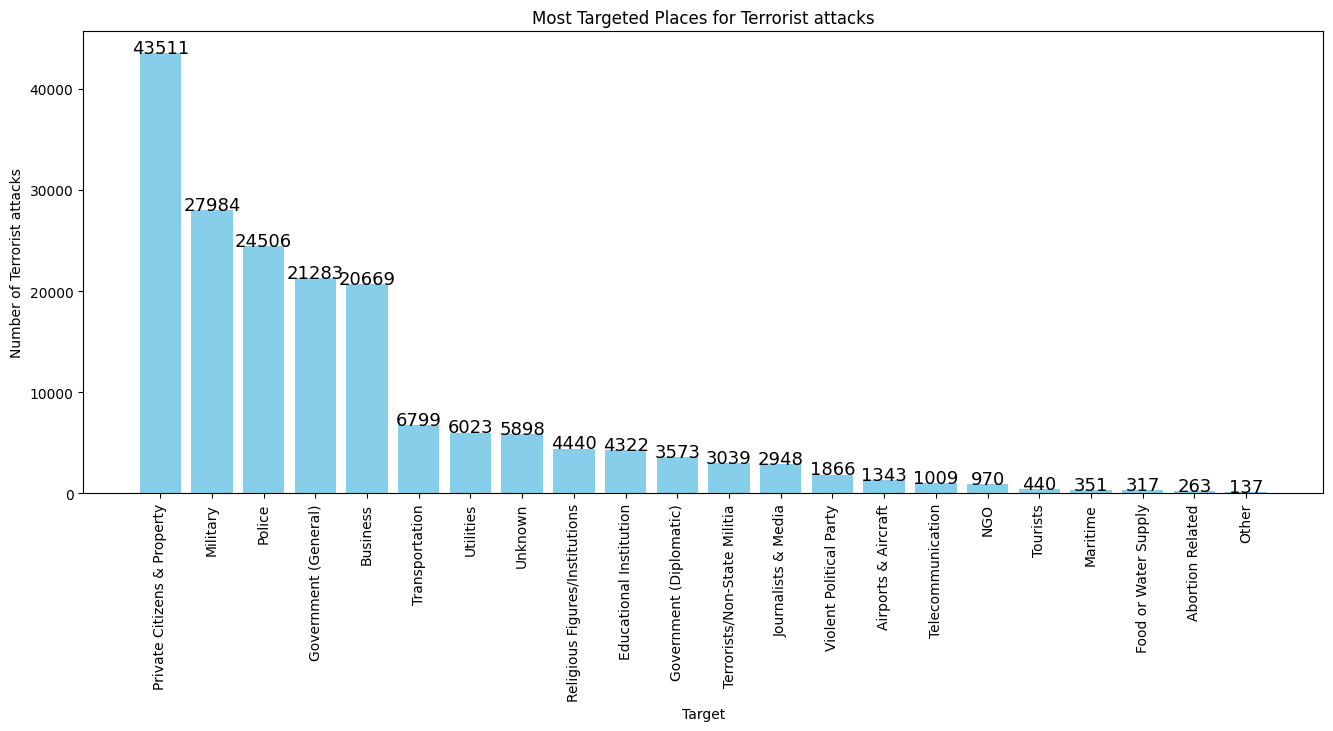

In [30]:
# Plotting the Most targeted Places for Terrorist Attacks

plt.figure(figsize=(16,6))
plt.bar(df.targtype1_txt.value_counts().index,df.targtype1_txt.value_counts().values,color='skyblue')
# set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted Places for Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.targtype1_txt.value_counts().values):
    plt.text(df.targtype1_txt.value_counts().index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [31]:
# Most terrorist attacks by top 20 different Groups
df.gname.value_counts()[:20]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

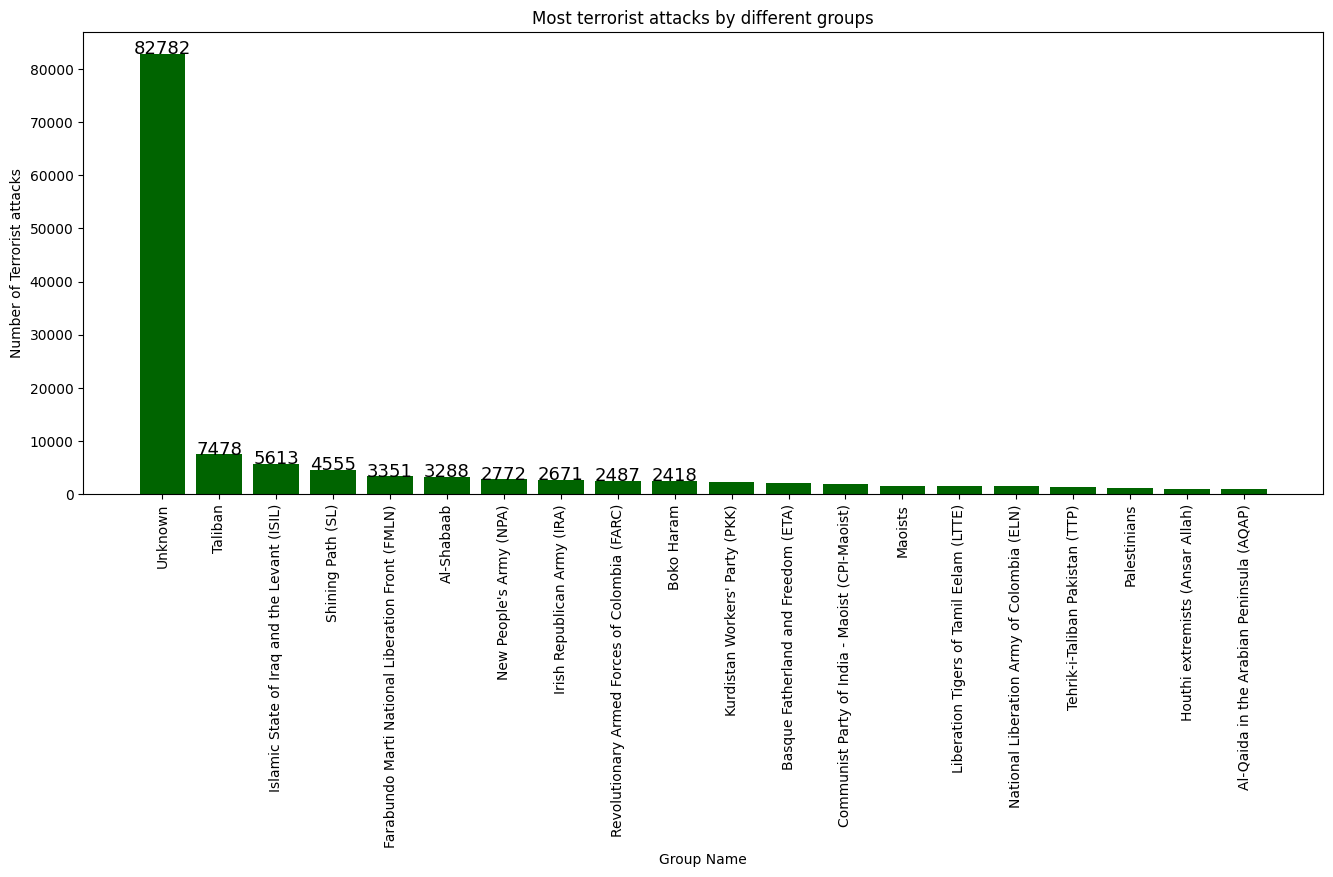

In [33]:
#Plotting the top 20 Most terrorist attacks by different Groups

plt.figure(figsize=(16,6))
plt.bar(df.gname.value_counts()[:20].index,df.gname.value_counts()[:20].values,color='darkgreen')
# set the axis labels and title
plt.xlabel('Group Name')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most terrorist attacks by different groups')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.gname.value_counts()[:10].values):
    plt.text(df.gname.value_counts()[:20].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [34]:
# Top 11 weapons used in Terrorist Attacks
df.weaptype1_txt.value_counts()[:20]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

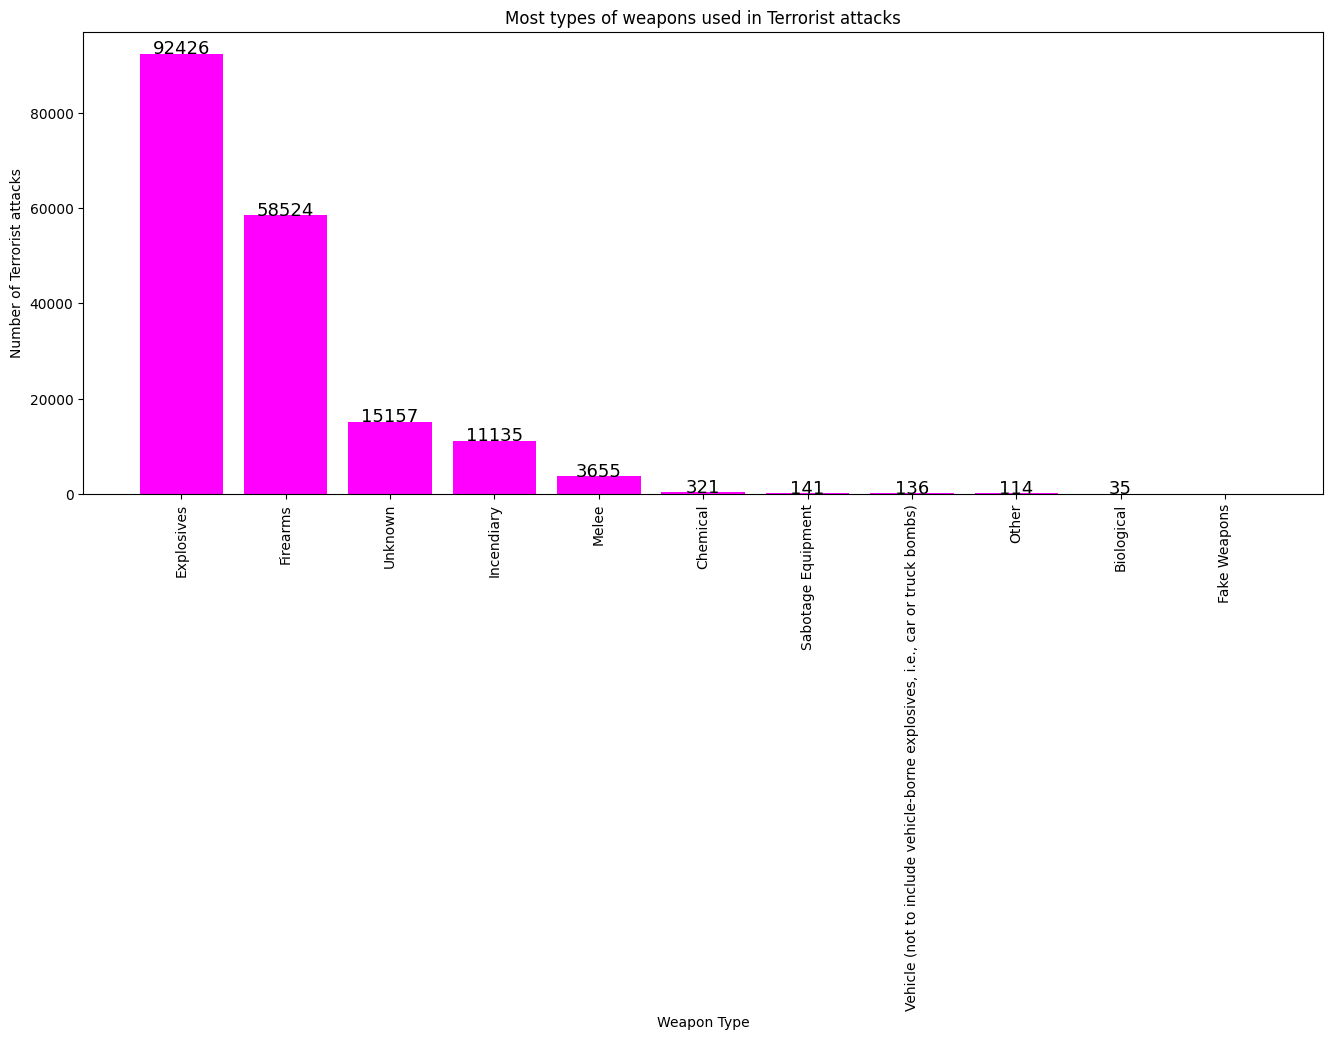

In [36]:
# Plotting the Top 11 weapons used in Terrorist Attacks

plt.figure(figsize=(16,6))
plt.bar(df.weaptype1_txt.value_counts()[:11].index,df.weaptype1_txt.value_counts()[:11].values,color='magenta')
# set the axis labels and title
plt.xlabel('Weapon Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(df.weaptype1_txt.value_counts()[:10].values):
    plt.text(df.weaptype1_txt.value_counts()[:11].index[i], v+0.2, str(round(v,2)), fontsize=13, color='black', ha='center')
# show the plot
plt.show()

In [37]:
# Terrorism Attacks occured by each Year
highest_values = df.groupby(['iyear'])['eventid'].count()
highest_values

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: eventid, dtype: int64

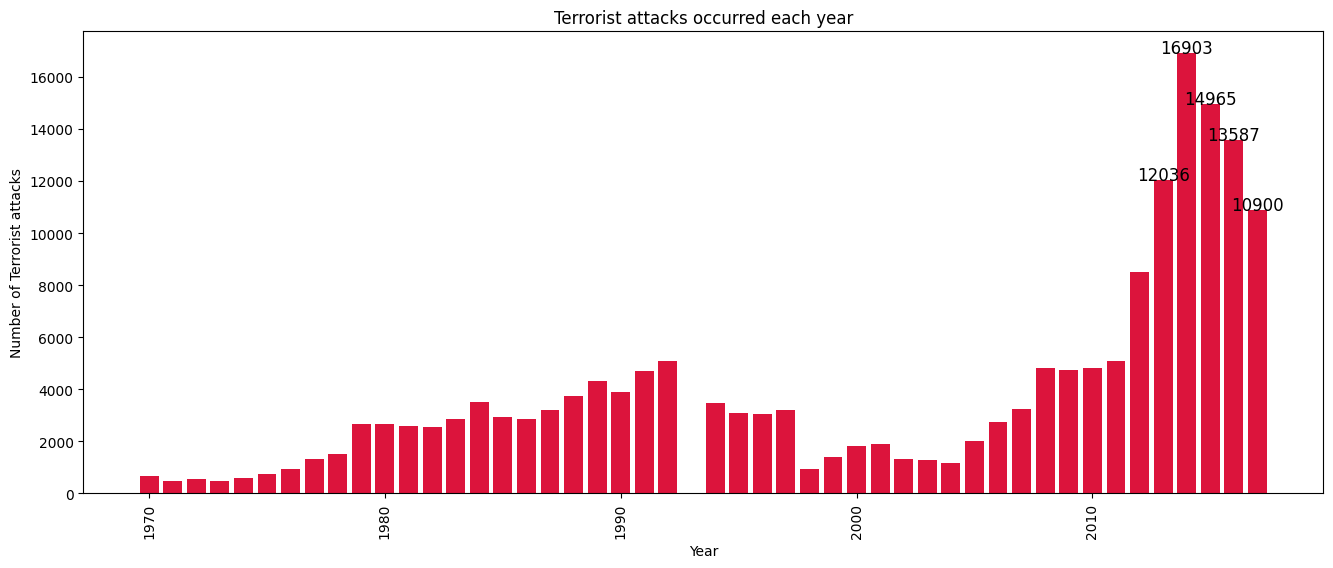

In [40]:
# Plotting Year vs Number of Terrorist Attacks

plt.figure(figsize=(16,6))
plt.bar(highest_values.index, highest_values.values,color='crimson')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occurred each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')
# show the plot
plt.show()

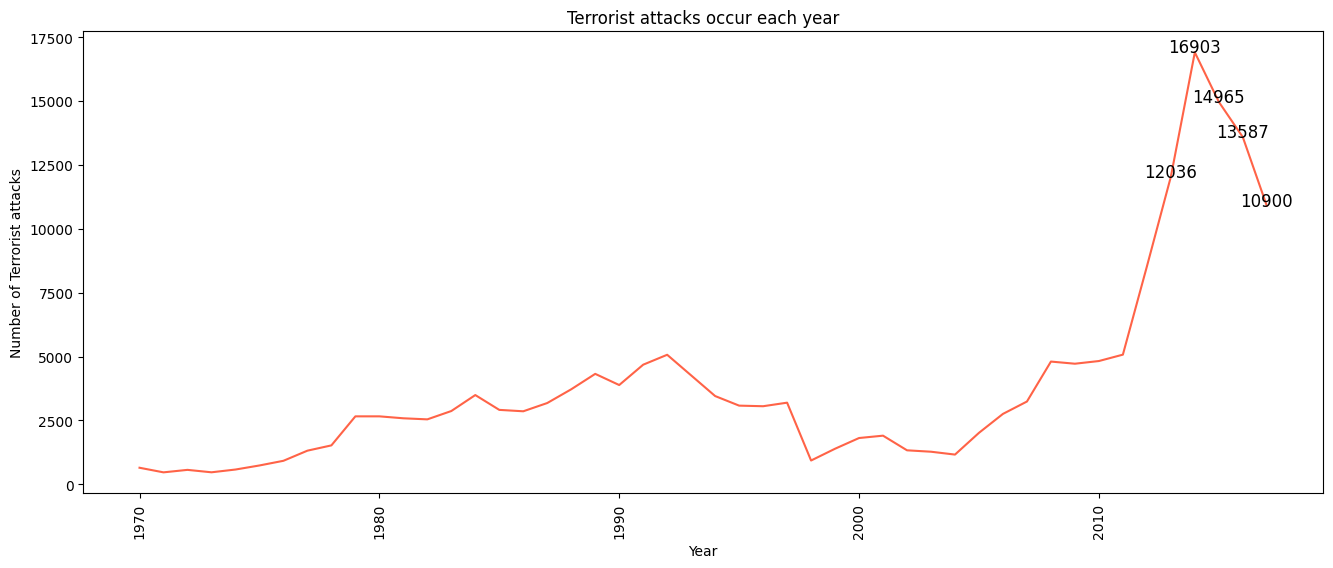

In [41]:
plt.figure(figsize=(16,6))
plt.plot(highest_values.index, highest_values.values, color="tomato")
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Terrorist attacks occur each year')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(highest_values.values):
    if v > 10000:
        plt.text(highest_values.index[i], v+0.2, str(round(v,2)), fontsize=12, color='black', ha='center')

In [42]:
# Lets Compare Terrorism from India and Pakistan

In [43]:
# Terrorism from India

df_india = df[df.country_txt == 'India']
df_india.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
1186,197202220004,1972,2,22,India,South Asia,Hijacking,Airports & Aircraft,Palestinians,Explosives,Hijacking DB
2764,197501190004,1975,1,2,India,South Asia,Bombing/Explosion,Government (General),Ananda Marga,Explosives,UMD Encyclopedia of World Terrorism 2012
3857,197605260001,1976,5,26,India,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
5327,197709280004,1977,9,28,India,South Asia,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,Hijacking DB
7337,197901130004,1979,1,13,India,South Asia,Armed Assault,Police,Naga People,Firearms,PGIS


In [44]:
# Terrorism from Pakistan
df_pakistan = df[df.country_txt == 'Pakistan']
df_pakistan.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource
585,197011010001,1970,11,1,Pakistan,South Asia,Assassination,Government (Diplomatic),Unknown,Vehicle (not to include vehicle-borne explosiv...,PGIS
2217,197402020001,1974,2,2,Pakistan,South Asia,Bombing/Explosion,Maritime,Muslim Guerrillas,Firearms,PGIS
2705,197412090001,1974,12,9,Pakistan,South Asia,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS
2744,197500000001,1975,0,0,Pakistan,South Asia,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,PGIS
2795,197502080001,1975,2,8,Pakistan,South Asia,Assassination,Government (General),National Awami Party,Firearms,PGIS


In [45]:
new_row = pd.DataFrame(data = {
    'country' : ['India','Pakistan','Other Countries'],
    'value' : [df_india.shape[0],df_pakistan.shape[0],df[(df.region_txt == 'South Asia') & (df.country_txt != 'India') & (df.country_txt != 'Pakistan')].shape[0]]
})
new_row = new_row.set_index('country')
new_row

,value
country,
India,11960
Pakistan,14368
Other Countries,18646


<Axes: ylabel='value'>

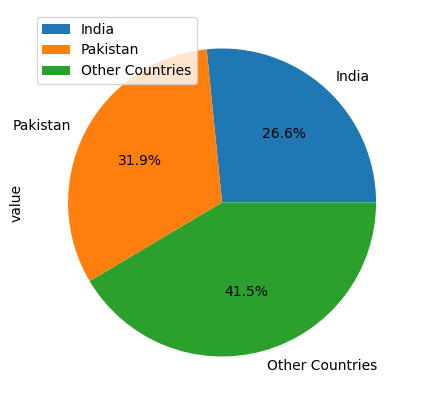

In [46]:
# PiePlotting

new_row.plot.pie(y='value', figsize=(5, 5),legend = 'country', autopct='%1.1f%%')

In [47]:
# More than 80% Terrorist Attacks from South Asia is from India and Pakistan

In [48]:
# Year wise Terrorism attack from India
india_year_wise_values = df_india.groupby(['iyear'])['eventid'].count()
india_year_wise_values

iyear
1972       1
1975       1
1976       1
1977       1
1979      20
1980      10
1981      16
1982      13
1983      47
1984     159
1985      39
1986      96
1987     166
1988     358
1989     324
1990     349
1991     339
1992     237
1994     107
1995     179
1996     213
1997     193
1998      61
1999     112
2000     180
2001     234
2002     184
2003     196
2004     108
2005     146
2006     167
2007     149
2008     534
2009     672
2010     663
2011     645
2012     611
2013     694
2014     860
2015     884
2016    1025
2017     966
Name: eventid, dtype: int64

In [49]:
# Year wise Terrorism attack from Pakistan
pakistan_year_wise_values = df_pakistan.groupby(['iyear'])['eventid'].count()
pakistan_year_wise_values

iyear
1970       1
1974       2
1975       2
1976       3
1978       2
1979       7
1980       1
1981       4
1982       4
1983       9
1984       3
1985       2
1986      24
1987      60
1988      44
1989      45
1990      87
1991     150
1992      85
1994     154
1995     666
1996     180
1997     206
1998      37
1999      39
2000      49
2001      53
2002      46
2003      29
2004      67
2005      77
2006     164
2007     260
2008     568
2009     667
2010     713
2011    1012
2012    1654
2013    2215
2014    2151
2015    1243
2016     864
2017     719
Name: eventid, dtype: int64

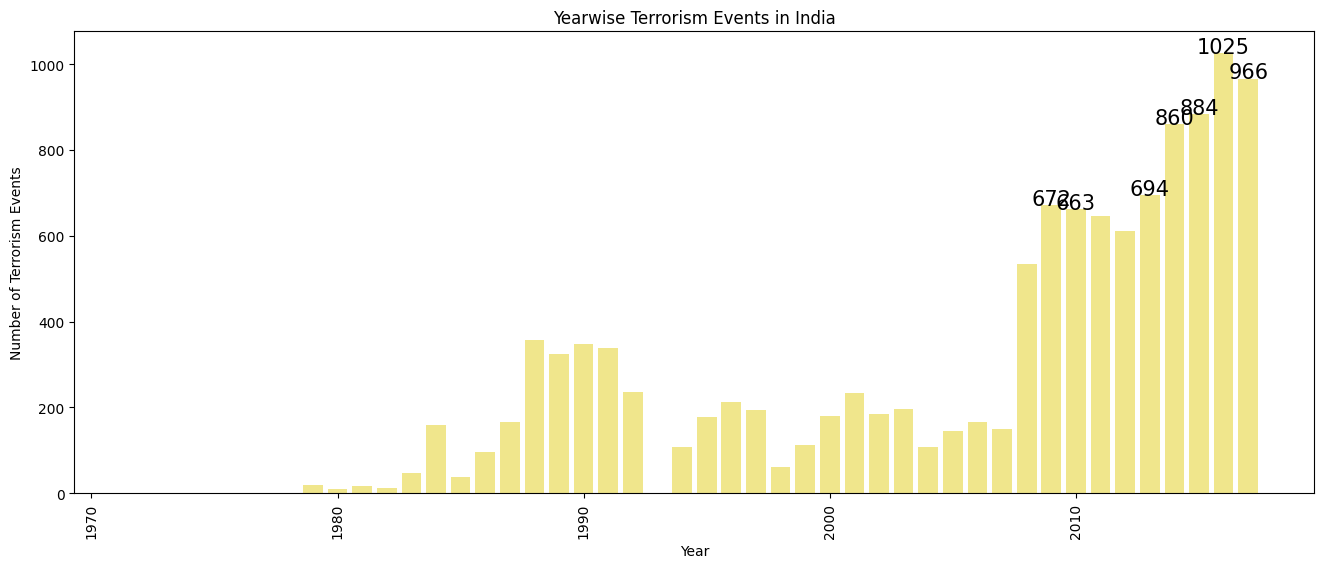

In [50]:
# Plotting the Year wise Terrorism attack from India

plt.figure(figsize=(16,6))
plt.bar(india_year_wise_values.index, india_year_wise_values.values,color='khaki')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(india_year_wise_values.values):
    if v > 650:
        plt.text(india_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

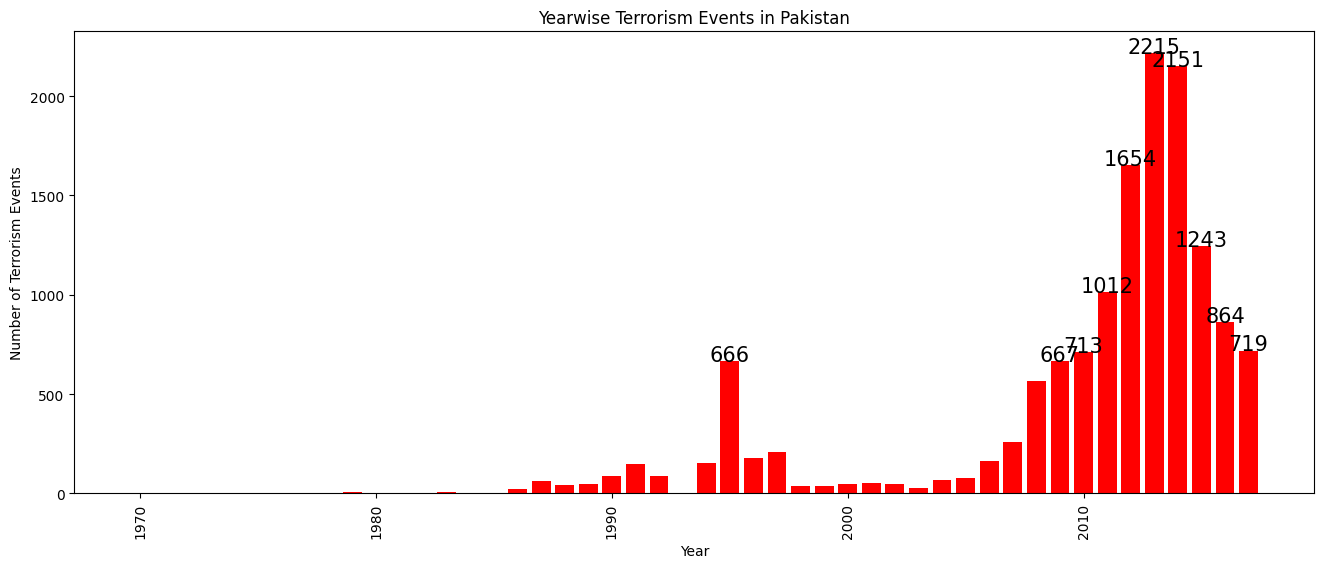

In [54]:
# Plotting the Year wise Terrorism attack from Pakistan

plt.figure(figsize=(16,6))
plt.bar(pakistan_year_wise_values.index, pakistan_year_wise_values.values,color='r')
# set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in Pakistan')

# # rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
for i, v in enumerate(pakistan_year_wise_values.values):
    if v > 650:
        plt.text(pakistan_year_wise_values.index[i], v+0.5, str(round(v,2)), fontsize=15, color='black', ha='center')
# show the plot
plt.show()

In [55]:
df_india_pakistan = pd.DataFrame({'India': india_year_wise_values, 'Pakistan': pakistan_year_wise_values})
df_india_pakistan.head()

,India,Pakistan
iyear,,
1970,NaN,1.0
1972,1.0,NaN
1974,NaN,2.0
1975,1.0,2.0
1976,1.0,3.0


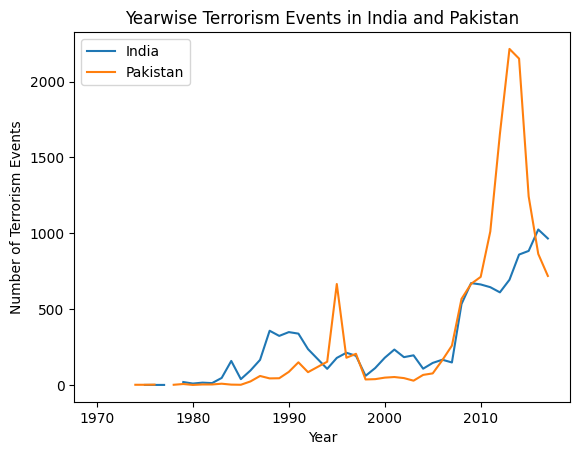

In [56]:
# Comparing yearwise Terrorism attacks in India and Pakistan

df_india_pakistan.plot()
plt.xlabel('Year')
plt.ylabel('Number of Terrorism Events')
plt.title('Yearwise Terrorism Events in India and Pakistan')
plt.legend()
plt.show()